   <h1 align="center"> <font color='#6F16B0'>Notebook 1: Préparation de données</font> <h1> 

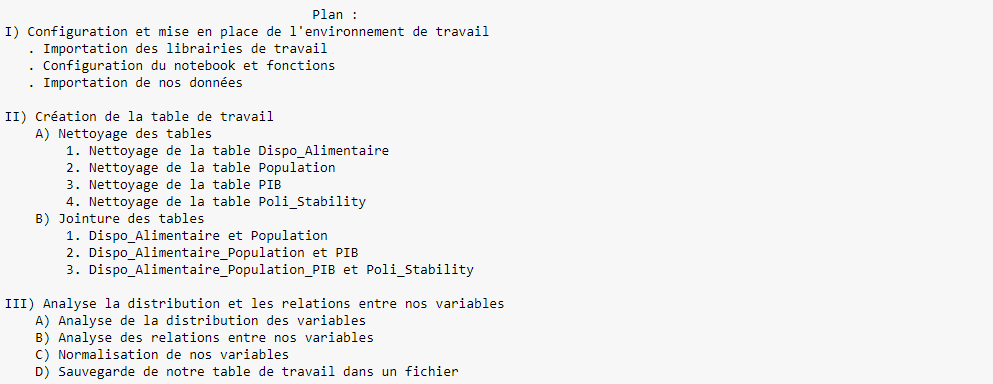

<h1 align="center"> <font color='#6F16B0'>I. Configuration et mise en place de l'environnement de travail</font>  <h1>

<h4 align="center"> <font color='#6F16B0'>Importation des librairies de travail</font>  <h4> 

In [1]:
# Importation de la librairie Pandas et numpy
import pandas as pd
import numpy as np

# Importation pour eviter les messages rouges d'erreurs
import warnings
warnings.filterwarnings("ignore")

# Importation datetime
from datetime import datetime
from datetime import date

# Import librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

<h4 align="center"> <font color='#6F16B0'> Configuration du notebook et fonctions </font> <h4> 

In [ ]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

<h4 align="center"> <font color='#6F16B0'> Importation de nos données </font> <h4> 

In [2]:
# Importation du fichier population.csv
Dispo_Alimentaire = pd.read_csv('C:/Users/user/Desktop/Projet_9/Donnees/DisponibiliteAlimentaire_2017.csv')

# Importation du fichier dispo_alimentaire.csv
Population = pd.read_csv('C:/Users/user/Desktop/Projet_9/Donnees/Population_2000_2018.csv')

# Importation du fichier PIB2017.csv
PIB2017 = pd.read_csv('C:/Users/User/Desktop/Projet_9/Donnees/PIB2017.csv')

# Importation du fichier PoliticalStability.csv
Poli_Stability = pd.read_csv('C:/Users/user/Desktop/Projet_9/Donnees/PoliticalStability.csv')

<h1 align="center"> <font color='#6F16B0'>II. Création de la table de travail</font>  <h1>    

<h2 align="center"> <font color='#6F16B0'>A) Nettoyage des tables</font>  <h2>       

<h4 align="center"> <font color='#6F16B0'> 1. Nettoyage de la table Dispo_Alimentaire </font>  <h4>   

In [3]:
# Afficher les dimensions du dataset

Dispo_Alimentaire.shape

(176600, 14)

In [4]:
# La nature des données dans chacune des colonnes

Dispo_Alimentaire.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [5]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple 

Dispo_Alimentaire.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [6]:
#Vérification qu'il n'y ait pas de doublons / compte le nombre de ligne en doublon

print(Dispo_Alimentaire.duplicated().sum())

0


In [7]:
# Vérification qu'il n'y ait pas de valeur nulle

Dispo_Alimentaire.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [8]:
# Affichage des 5 premières lignes de la table

Dispo_Alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [9]:
# On supprime les colonnes dont nous n'avons pas besoin

Dispo_Alimentaire.drop(columns=['Code Domaine','Domaine', 'Code Élément','Code Produit','Code année','Symbole','Description du Symbole'], inplace=True)

In [10]:
# Conserve uniquement le produit qui nous interesse à notre analyse

Dispo_Alimentaire_volaille = Dispo_Alimentaire.loc[Dispo_Alimentaire['Produit']==  'Viande de Volailles']
Dispo_Alimentaire_volaille.head()

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
651,2,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.0
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0
653,2,Afghanistan,Variation de stock,Viande de Volailles,2017,Milliers de tonnes,0.0
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.0
655,2,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.0


In [11]:
# Pivot table pour récupérer les infos de 'élément' en colonnes

Dispo_Alimentaire_volaille = Dispo_Alimentaire_volaille.pivot_table(index='Zone', columns='Élément', values='Valeur').reset_index()

In [12]:
Dispo_Alimentaire_volaille.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [13]:
# Création de nouvelles variables
# taux de dépendance aux importations (TDI) = (Importation/dispo interieur) *100
# taux d'auto suffisance (TAS) = (production/dispo interieur) *100

Dispo_Alimentaire_volaille['TDI (%)'] = round((Dispo_Alimentaire_volaille['Importations - Quantité']/Dispo_Alimentaire_volaille['Disponibilité intérieure'])*100,2)
Dispo_Alimentaire_volaille['TAS (%)'] = round((Dispo_Alimentaire_volaille['Production']/Dispo_Alimentaire_volaille['Disponibilité intérieure'])*100,2)
Dispo_Alimentaire_volaille.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,TDI (%),TAS (%)
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0,50.88,49.12
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0,24.27,78.71
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0,80.85,27.66
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0,0.72,99.28
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0,48.42,87.06


In [14]:
# dataset finale de la dispo alimentaire avec les champs qu'on garde 

Dispo = Dispo_Alimentaire_volaille.loc[:,['Zone','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Nourriture', 'TAS (%)', 'TDI (%)']]
Dispo.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%)
0,Afghanistan,1.53,5.0,0.54,55.0,49.12,50.88
1,Afrique du Sud,35.69,143.0,14.11,2035.0,78.71,24.27
2,Albanie,16.36,85.0,6.26,47.0,27.66,80.85
3,Algérie,6.38,22.0,1.97,264.0,99.28,0.72
4,Allemagne,19.47,71.0,7.96,1609.0,87.06,48.42


In [15]:
# df_dispo[df_dispo['TDI (%)'].isna()] # Exemple avec la variable TDI(%)
Dispo.isna().sum()

Élément
Zone                                                        0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Nourriture                                                  2
TAS (%)                                                     4
TDI (%)                                                     2
dtype: int64

 > *On regarde si nous n'avons pas de valeur null. Ici nous avons 4 pays dont nous connaissons pas leur TAS dont 2 ou nous n'avons pas leur TDI et nourrtirue. Il s'agit de : Djibouti / Maldives / Ouzbékistan / République démocratique populaire lao. On décide de les écarter de l'analyse.*

In [16]:
# Suppression de ces 4 pays dans mon analyse. Il me manque trop d'infos pour ne pas biaiser mon analyse

Dispo = Dispo.dropna(subset=['TAS (%)']) # Suppression des 2 pays

In [17]:
# Changement d'unité pour passer en tonnes de nourriture (à l'année)

Dispo['Nourriture'] = Dispo['Nourriture']*1000
Dispo['Nourriture'] = Dispo['Nourriture'].astype(int)

In [18]:
# Affichage des 5 premières lignes de la table dispo finale

Dispo.head()

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%)
0,Afghanistan,1.53,5.0,0.54,55000,49.12,50.88
1,Afrique du Sud,35.69,143.0,14.11,2035000,78.71,24.27
2,Albanie,16.36,85.0,6.26,47000,27.66,80.85
3,Algérie,6.38,22.0,1.97,264000,99.28,0.72
4,Allemagne,19.47,71.0,7.96,1609000,87.06,48.42


In [19]:
# Nous avons 168 zones

Dispo['Zone'].nunique()

168

In [20]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_Dispo_Zone = Dispo['Zone'].tolist()

<h4 align="center"> <font color='#6F16B0'> 2. Nettoyage de la table Population </font>  <h4>       

In [21]:
#Afficher les dimensions du dataset

Population.shape

(4411, 15)

In [22]:
# La nature des données dans chacune des colonnes

Population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [23]:
# Vérification qu'il n'y ait pas de valeur nulle --> ici note mais on utilisera pas ce champs

Population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [24]:
# Vérification qu'il n'y ait pas de doublons 

Population.duplicated().sum()

0

In [25]:
# Affichage des 5 premières lignes de la table

Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [26]:
# On met à la bonne echelle le nombre de population (passe de millier à unité)

Population['Valeur'] = (Population['Valeur']*1000).astype(int)


In [27]:
# On supprime les colonnes dont nous n'avons pas besoin

Population.drop(columns=['Domaine','Code Domaine','Code zone','Code Élément','Élément','Code Produit','Produit','Code année', 'Unité','Symbole','Note', 'Description du Symbole', ], inplace=True)

In [28]:
# On garde seulement les valeurs du nbr de population de 2013 et 2017 pou y calculer un taux de croissance demographique sur 5ans

Population = Population.loc[Population['Année'].isin([2013,2017]),:]
Population['TCD (%)'] = round(Population.groupby('Zone')['Valeur'].pct_change()*100,2)

In [29]:
# On garde seulement l'année 2017 car ca sera l'année de notre étude

Population = Population.loc[Population['Année']==2017,:]

In [30]:
# On renomme nos champs

Population = Population.rename(columns={"Valeur": "Nbr Habitant"})
Population.drop(columns=['Année', ], inplace=True)

In [31]:
# On affiche notre table population nettoyé

Population.head()

,Zone,Nbr Habitant,TCD (%)
17,Afghanistan,36296113,12.48
36,Afrique du Sud,57009756,6.19
55,Albanie,2884169,-0.68
74,Algérie,41389189,8.52
93,Allemagne,82658409,1.83


In [32]:
# Nous avons 236 zones

Population['Zone'].nunique()

236

In [33]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_Population_Zone = Population['Zone'].tolist()

<h4 align="center"> <font color='#6F16B0'> 3. Nettoyage de la table PIB </font>  <h4>       

In [34]:
# Ajout de données macro économique, ici on a le PIB (de l'année 2017) par habitant en $

In [35]:
#Afficher les dimensions du dataset

PIB2017.shape

(211, 15)

In [36]:
# La nature des données dans chacune des colonnes

PIB2017.dtypes

Code Domaine               object
Domaine                    object
Code zone (M49)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                      float64
dtype: object

In [37]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

PIB2017.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,211.000000,211.0,211.0,211.0,211.0,211.000000,0.0
mean,429.407583,6119.0,22008.0,2017.0,2017.0,16886.035415,NaN
std,251.237972,0.0,0.0,0.0,0.0,25550.733577,NaN
min,4.000000,6119.0,22008.0,2017.0,2017.0,295.620936,NaN
25%,210.000000,6119.0,22008.0,2017.0,2017.0,2082.324019,NaN
50%,430.000000,6119.0,22008.0,2017.0,2017.0,6450.319585,NaN
75%,642.500000,6119.0,22008.0,2017.0,2017.0,19806.127104,NaN
max,894.000000,6119.0,22008.0,2017.0,2017.0,173611.814788,NaN


In [38]:
# Vérification qu'il n'y ait pas de valeur nulle --> ici "Note" mais on utilisera pas ce champs

PIB2017.isna().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      211
dtype: int64

In [39]:
# Vérification qu'il n'y ait pas de doublons 

PIB2017.duplicated().sum()

0

In [40]:
# Affichage des 5 premières lignes de la table

PIB2017.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752219,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936054,X,Ciffre de sources internationales,NaN


In [41]:
#On créait notre table PIB en gardant uniquement les données qui nous interesse

PIB = PIB2017.loc[:,['Zone','Valeur']]

In [42]:
# On arrondit la valeur du PIB en entier

PIB['Valeur'] = round(PIB['Valeur']).astype(int)

In [43]:
# On renomme nos champs

PIB = PIB.rename(columns={"Valeur": "PIB/hab$"})

In [44]:
# On affiche notre table PIB nettoyé

PIB.head()

,Zone,PIB/hab$
0,Pays-Bas (Royaume des),48461
1,Afghanistan,530
2,Afrique du Sud,6724
3,Albanie,4522
4,Algérie,4135


In [45]:
# Nous avons 211 zones

PIB['Zone'].nunique()

211

In [46]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_PIB_Zone = PIB['Zone'].tolist()

<h4 align="center"> <font color='#6F16B0'> 4. Nettoyage de la table Poli_Stability </font>  <h4>     

In [47]:
# Ajout de données politiques, ici sur la stabilité politique des pays

Poli_Stability.shape

(3526, 4)

In [48]:
Poli_Stability.head()

,Country,Year,Political_Stability,Granularity
0,Afghanistan,2000,-2.44,Total
1,Afghanistan,2002,-2.04,Total
2,Afghanistan,2003,-2.20,Total
3,Afghanistan,2004,-2.30,Total
4,Afghanistan,2005,-2.07,Total


In [49]:
# On ne garde que les informations de l'année 2017

Poli_Stability = Poli_Stability.loc[Poli_Stability['Year']==2017,:]

In [50]:
# On ne garde seulement le pays et le taux de stabilité politique

Poli_Stability = Poli_Stability.loc[:,['Country', 'Political_Stability']]

In [51]:
# On renomme nos champs:

Poli_Stability = Poli_Stability.rename(columns={"Political_Stability": "Stabilite_Politique","Country":"Pays" })

In [52]:
# Valeur allant de -3 à 2: plus dans le negatif moins le pays est stable, plus il est positif plus il est stable
# Poli_Stability.sort_values(by='Stabilite_Politique', ascending=False).head(10)

In [54]:
# Importation du fichier de mapping.csv
table_mapping = pd.read_csv('C:/Users/user/Desktop/Projet_9/Donnees/sql-pays.csv', header=None, names=['Col1','Col2', 'ISO2','ISO3', 'Pays_FR','Pays_EN'])
table_mapping.drop(columns=['Col1','Col2','ISO2','ISO3'], inplace=True)
table_mapping.head()

,Pays_FR,Pays_EN
0,Afghanistan,Afghanistan
1,Albanie,Albania
2,Antarctique,Antarctica
3,Algérie,Algeria
4,Samoa Américaines,American Samoa


In [55]:
# Nous renommons quelques zones de la table poli_stability pour qu'ils aient le même nom que dans la table de mapping
# On enlève les espaces vides derrière les chaines de caractères avec str.rstrip() 

Poli_Stability = Poli_Stability.rename(columns={"Pays": "Pays_EN"})
Poli_Stability['Pays_EN']=Poli_Stability['Pays_EN'].str.rstrip()         
Poli_Stability['Pays_EN'].replace({'Bolivia (Plurinational State of)':'Bolivia',
                                   'Cabo Verde':'Cape Verde',
                                   'Central African Republic':'Central African',
                                   'Democratic Republic of the Congo':'The Democratic Republic Of The Congo',
                                   'Czechia':'Czech Republic',
                                   'Iran (Islamic Republic of)':'Islamic Republic of Iran',
                                   'Libya':'Libyan Arab Jamahiriya',
                                   'Micronesia (Federated States of)':'Federated States of Micronesia',
                                   'Montenegro':'Serbia and Montenegro',
                                   'United Kingdom':'United Kingdom of Great Britain and Northern Ireland',
                                   'United Republic of Tanzania':'United Republic Of Tanzania',
                                   'United States of America':'United States',
                                   'Venezuela (Bolivarian Republic of)':'Venezuela'
                                      },inplace=True)

In [56]:
# On fait la jointure entre ces deux tables
# On remarque que 12 pays de la table de stabilité politique n'ont pas trouvé leurs correspondances dans la table de mapping

Poli_Stability_map = pd.merge(Poli_Stability, table_mapping, on=['Pays_EN'], how='outer', indicator=True)
Poli_Stability_map['_merge'].value_counts()

both          186
right_only     55
left_only      12
Name: _merge, dtype: int64

In [57]:
# On affiche ces pays:

Poli_Stability_map.loc[Poli_Stability_map['_merge']=='left_only']

# Création d'une table de ces 12 pays qui n'ont pas trouvé de correspondance

Pas_Correspondance = Poli_Stability_map.loc[Poli_Stability_map['_merge']=='left_only']

In [58]:
# On supprime ces pays de la nouvelle table Poli_Stability_map ainsi que les 55 pays en trop de notre table de mapping
# et on suprime notre colonne merge pour la future jointure.

Poli_Stability_map.drop(Poli_Stability_map[Poli_Stability_map['_merge']=='right_only'].index, inplace=True)
Poli_Stability_map.drop(Poli_Stability_map[Poli_Stability_map['_merge']=='left_only'].index, inplace=True)
Poli_Stability_map.drop(columns=['_merge'], inplace=True)

In [59]:
# Création d'un dictionnaire avec les nom en francais des 12 pays qui manquent:

dico = {'China, Hong Kong SAR': 'Chine - RAS de Hong-Kong',
        'China, Macao SAR':'Chine - RAS de Macao',
        'China, mainland':'Chine, continentale',
        'China, Taiwan Province of':'Chine, Taiwan Province de',
        'Congo':'Congo',
        'Eswatini':'Eswatini',
        'North Macedonia':'Macedoine du nord',
        'Palestine':'Palestine',
        'Serbia':'Serbie',
        'South Sudan':'Soudan du Sud',
        'United Kingdom of Great Britain and Northern Ireland':"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
        'Viet Nam':'Viet Nam'
    }

In [60]:
# On met en forme cette nouvelle table Pas_Correspondance en lui ajoutant la valeurs du dictionnaire 

Pas_Correspondance['Pays_FR'] = Pas_Correspondance['Pays_EN'].map(dico)
Pas_Correspondance.drop(columns=['_merge'], inplace=True)
Pas_Correspondance

,Pays_EN,Stabilite_Politique,Pays_FR
37,"China, Hong Kong SAR",0.83,Chine - RAS de Hong-Kong
38,"China, Macao SAR",1.43,Chine - RAS de Macao
39,"China, mainland",-0.23,"Chine, continentale"
40,"China, Taiwan Province of",0.86,"Chine, Taiwan Province de"
43,Congo,-0.53,Congo
62,Eswatini,-0.27,Eswatini
130,North Macedonia,-0.25,Macedoine du nord
135,Palestine,-1.66,Palestine
157,Serbia,0.09,Serbie
166,South Sudan,-2.45,Soudan du Sud


In [61]:
# Concatenation de Poli_Stability_map et de Pas_Correspondance:

Poli_Stability = pd.concat([Poli_Stability_map, Pas_Correspondance], ignore_index=True)
Poli_Stability.drop(columns=['Pays_EN'], inplace=True)
Poli_Stability.rename(columns={"Pays_FR": "Zone"}, inplace=True)
Poli_Stability.head()                                   

,Stabilite_Politique,Zone
0,-2.80,Afghanistan
1,0.38,Albanie
2,-0.92,Algérie
3,1.22,Samoa Américaines
4,1.42,Andorre


In [62]:
# Nous avons 198 zones

Poli_Stability['Zone'].nunique()

198

In [63]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_Poli_Stability_Zone = Poli_Stability['Zone'].tolist()

<h2 align="center"> <font color='#6F16B0'> B) Jointure des tables </font>  <h2>         

In [64]:
# Mon choix : Dans nos jointures nous faisons attention à ne garder que les jointure internes car nous ne voulons aucunes 
# variables avec une valeurs manquantes pour ne pas biaisé nos analyse de clustering derrière.

<h4 align="center"> <font color='#6F16B0'> 1. Dispo_Alimentaire et Population </font>  <h4>       

In [65]:
# Vérifie les listes entre le df Dispo et Population, pour se demander si les zones sont les mêmes.

List_PasCorrespondance_Zone_DispoPopulation = [x for x in List_Population_Zone + List_Dispo_Zone if x not in List_Population_Zone or x not in List_Dispo_Zone]

In [66]:
# 68 pays ne correspondent pas entre ces deux tables 

len(List_PasCorrespondance_Zone_DispoPopulation)

68

In [67]:
# 68 zones qui ne sont pas referencés dans la table Dispo --> bcp de pays qui dépendandes de grandes puissances 
# (dom tom francais...)/ Pays pas reconnus comme tel par tout le monde / etc...

# Configure display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

Population.loc[Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulation), :]

,Zone,Nbr Habitant,TCD (%)
112,Andorre,77001,-4.67
150,Anguilla,14584,4.51
188,Antilles néerlandaises (ex),275186,4.29
264,Aruba,105366,2.14
359,Bahreïn,1494076,13.62
492,Bermudes,63049,-2.08
511,Bhoutan,745563,4.97
538,"Bonaire, Saint-Eustache et Saba",25401,8.07
614,Brunéi Darussalam,424473,4.96
671,Burundi,10827019,13.49


In [68]:
# Sauvegarde les 68 zones qu'on ne prendra pas de la table population

S_Population = Population.loc[Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulation), :]

In [69]:
# On peut comparer les pays de Dispo avec ceux de Population pour voir si il y a des soucis de libellés. 

Dispo['Zone'].values

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Dominique', 'El Salvador', 'Espagne',
       'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'France',
       'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grenade',
       'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana',
       'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Inde', 'Indoné

In [70]:
# 1ière Jointure entre Dispo et Population

Dispo_Population = pd.merge(Dispo, Population, on=['Zone'], how='inner', indicator=True)

In [71]:
# Vérifie notre jointure

Dispo_Population['_merge'].value_counts()

both          168
left_only       0
right_only      0
Name: _merge, dtype: int64

In [72]:
# Supprime l'indicateur pour la prochaine jointure

Dispo_Population.drop(columns=['_merge'], inplace=True)

In [73]:
# On vérifie la longueur de la nouvelle table, on a autant de Pays que la table Dispo comme on pouvait s'y attendre

Dispo_Population.shape

(168, 9)

In [74]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_DispoPopulation_Zone = Dispo_Population['Zone'].tolist()

<h4 align="center"> <font color='#6F16B0'> 2. Dispo_Alimentaire_Population et PIB </font>  <h4>     

In [75]:
# Vérifie les listes entre le df Dispo_Population et PIB, pour se demander si les Pays sont les mêmes.

List_PasCorrespondance_Zone_DispoPopulationPIB = [x for x in List_DispoPopulation_Zone + List_PIB_Zone if x not in List_DispoPopulation_Zone or x not in List_PIB_Zone]

In [76]:
# 47 pays ne correspondent pas entre ces deux tables

len(List_PasCorrespondance_Zone_DispoPopulationPIB)

47

In [77]:
# 45 pays qui ne sont pas referencé dans la table Dispo_Population

len(PIB.loc[PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :])

# Sauvegarde les 45 zones qu'on ne prendra pas de la table PIB

S_PIB = PIB.loc[PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :]

In [78]:
# Les pays de PIB qui ne sont pas dans la table de Dispo_Population
# Beaucoup de regroupement de zone comme la guinée équatoriale / ou la chine / Bcp de DOM-TOM de grandes puissances
# les iles comme saint marin etc

PIB.loc[PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :]

,Zone,PIB/hab$
0,Pays-Bas (Royaume des),48461
6,Andorre,40632
8,Anguilla,18718
13,Aruba,29329
18,Bahreïn,24350
25,Bermudes,112877
26,Bhoutan,3241
31,Brunéi Darussalam,28187
34,Burundi,296
40,Chine,8808


In [79]:
# On peut comparer les zones de PIB avec ceux de Population pour voir si il y a des soucis de libellés. 

Dispo_Population['Zone'].values

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Dominique', 'El Salvador', 'Espagne',
       'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'France',
       'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grenade',
       'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana',
       'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Inde', 'Indoné

In [80]:
# 2 pays qui ne sont pas referencé dans la table PIB

len(Dispo_Population.loc[Dispo_Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :])

2

In [81]:
# Les pays de Dispo_Population qui ne sont pas dans Table PIB

Dispo_Population.loc[Dispo_Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :]

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%)
33,"Chine, Taiwan Province de",33.17,126.0,11.01,785000,83.06,20.51,23674546,1.08
114,Pays-Bas,20.33,70.0,8.48,346000,295.70,163.44,17021347,1.06


In [82]:
# Nous n'avons pas Taiwan ni chine province de taiwan dans notre table de PIB nous decidons donc de ne pas le garder lors de la jointure
# Pour les pays-Bas juste le libéllé est pas bon donc je le renomme

PIB['Zone'] = PIB['Zone'].replace(to_replace='Pays-Bas (Royaume des)', value='Pays-Bas')

In [83]:
# Création d'une liste de toutes les zones, qui servira pour les jointures
List_PIB_Zone = PIB['Zone'].tolist()

# On recréait notre liste avec les dernières modifications
List_PasCorrespondance_Zone_DispoPopulationPIB = [x for x in List_DispoPopulation_Zone + List_PIB_Zone if x not in List_DispoPopulation_Zone or x not in List_PIB_Zone]

# Vérifie que le pays "Pays-Bas" ne fait plus partie de cette liste de non correspondance entre ces deux tables.
Dispo_Population.loc[Dispo_Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :]

# Sauvegarde 1 zone: tawain qu'on ne prendra pas de la table Dispo_Polulation
S_Dispo_Polulation = Dispo_Population.loc[Dispo_Population['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIB), :]

In [84]:
# 2ième Jointure entre Dispo_Population et PIB

Dispo_Population_PIB = pd.merge(Dispo_Population, PIB, on=['Zone'], how='inner', indicator=True)

In [85]:
# Vérifie notre jointure

Dispo_Population_PIB['_merge'].value_counts()

both          167
left_only       0
right_only      0
Name: _merge, dtype: int64

In [86]:
# Supprime l'indicateur pour la prochaine jointure

Dispo_Population_PIB.drop(columns=['_merge'], inplace=True)

In [87]:
# On vérifie la longueur de la nouvelle table, on a autant de Pays que la table Dispo comme on pouvait s'y attendre

Dispo_Population_PIB.shape

(167, 10)

In [88]:
# Test : 
Dispo_Population_PIB['Zone']=Dispo_Population_PIB['Zone'].str.rstrip()

In [89]:
# Création d'une liste de toutes les zones, qui servira pour les jointures

List_DispoPopulationPIB_Zone = Dispo_Population_PIB['Zone'].tolist()

<h4 align="center"> <font color='#6F16B0'> 3. Dispo_Alimentaire_Population_PIB et Poli_Stability </font>  <h4>       

In [90]:
# Vérifie les listes entre le df Dispo_Population_PIB et PIB, pour se demander si les Pays sont les mêmes.

List_PasCorrespondance_Zone_DispoPopulationPIBPoli = [x for x in List_DispoPopulationPIB_Zone + List_Poli_Stability_Zone if x not in List_DispoPopulationPIB_Zone or x not in List_Poli_Stability_Zone]

In [91]:
# 61 zones ne correspondent pas entre ces deux tables

len(List_PasCorrespondance_Zone_DispoPopulationPIBPoli)

61

In [92]:
# 15 zones de la table d'instalibilité politique qui ne sont pas referencé dans la table Dispo_Population_PIB

len(Dispo_Population_PIB.loc[Dispo_Population_PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIBPoli), :])

15

In [93]:
Dispo_Population_PIB.loc[Dispo_Population_PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIBPoli), :]

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$
7,Arabie saoudite,43.36,151.0,15.57,1435000,42.93,50.31,33101178,10.15,20138
18,Bolivie (État plurinational de),36.00,155.0,11.43,403000,124.24,0.23,11192855,6.17,3280
26,Cabo Verde,17.62,62.0,6.52,9000,10.00,120.00,537498,5.03,3133
66,Iran (République islamique d'),27.52,96.0,9.80,2220000,97.93,0.27,80673883,5.48,5961
86,Macédoine du Nord,19.73,68.0,7.01,41000,4.88,97.56,2081996,0.29,5354
97,Monténégro,15.98,55.0,5.79,10000,40.00,80.00,627563,0.19,7679
105,Nouvelle-Calédonie,38.71,136.0,14.05,11000,9.09,81.82,277150,4.88,32263
116,Polynésie française,47.40,167.0,16.20,13000,6.67,100.00,276102,2.14,19744
122,République centrafricaine,2.29,8.0,0.78,11000,63.64,36.36,4596023,3.33,415
125,République dominicaine,35.26,123.0,10.88,371000,90.40,11.20,10513104,4.63,7513


In [94]:
# Modification de libellés de 13 zones/15 de la table poli_stability: 

Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Arabie Saoudite', value='Arabie saoudite')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Bolivie', value='Bolivie (État plurinational de)')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Cap-vert', value='Cabo Verde')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace="République Islamique d'Iran", value="Iran (République islamique d')")
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Macedoine du nord', value='Macédoine du Nord')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Serbie-et-Monténégro', value='Monténégro')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='République Centrafricaine', value='République centrafricaine')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='République Dominicaine', value='République dominicaine')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='République Populaire Démocratique de Corée', value='République populaire démocratique de Corée')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Venezuela', value='Venezuela (République bolivarienne du)')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='Émirats Arabes Unis', value='Émirats arabes unis')
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='États-Unis', value="États-Unis d'Amérique")
Poli_Stability['Zone'] = Poli_Stability['Zone'].replace(to_replace='République Tchèque', value="Tchéquie")



# 2 zones manquantes: Nouvelle-Calédonie / Polynésie française --> DOM-TOM francais donc pas très impactant dans les analyses.

In [95]:
# Vérification de nos modifications :

# On recréer la liste des zones de Poli_stability
List_Poli_Stability_Zone = Poli_Stability['Zone'].tolist()

# Vérifie les listes des zones entre le df Dispo_Population_PIB et Poli_instability
List_PasCorrespondance_Zone_DispoPopulationPIBPoli = [x for x in List_DispoPopulationPIB_Zone + List_Poli_Stability_Zone if x not in List_DispoPopulationPIB_Zone or x not in List_Poli_Stability_Zone]

# 2 zones de la table d'instalibilité politique qui ne sont pas referencé dans la table Dispo_Population_PIB
len(Dispo_Population_PIB.loc[Dispo_Population_PIB['Zone'].isin(List_PasCorrespondance_Zone_DispoPopulationPIBPoli), :])

2

In [96]:
# 3ième jointure entre Dispo_Population_PIB et Poli_Stability

df = pd.merge(Dispo_Population_PIB, Poli_Stability, on=['Zone'], how='outer', indicator=True)

In [97]:
df['_merge'].value_counts()

both          165
right_only     33
left_only       2
Name: _merge, dtype: int64

In [98]:
# On Sauvegarde ce qu'on utilise pas: les 2 zones de Dispo_Population_PIB et les 33 zones de Poli_Stability

S_df = pd.concat([df.loc[df['_merge']=='right_only',:], df.loc[df['_merge']=='left_only',:]], ignore_index=True)

In [99]:
# On créait une table de sauvegarde regroupant toutes nos sauvegardes

S_1 = pd.merge(S_Dispo_Polulation, S_Population, on=['Zone'], how='outer')
S_2 = pd.merge(S_1, S_PIB, on=['Zone'], how='outer')
S_df_finale = pd.merge(S_2, S_df, on=['Zone'], how='outer')
S_df_finale

,Zone,Disponibilité alimentaire en quantité (kg/personne/an)_x,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,Nourriture_x,TAS (%)_x,TDI (%)_x,Nbr Habitant_x,TCD (%)_x,Nbr Habitant_y,...,Disponibilité alimentaire (Kcal/personne/jour)_y,Disponibilité de protéines en quantité (g/personne/jour)_y,Nourriture_y,TAS (%)_y,TDI (%)_y,Nbr Habitant,TCD (%),PIB/hab$_y,Stabilite_Politique,_merge
0,"Chine, Taiwan Province de",33.17,126.0,11.01,785000.0,83.06,20.51,23674546.0,1.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86,right_only
1,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,right_only
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14584.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275186.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494076.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.96,right_only
6,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63049.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,right_only
7,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,745563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,right_only
8,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424473.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16,right_only


In [100]:
# On garde seulement les jointures interne entre notre table Dispo_Population_PIB et Poli_Stability

df.drop(df[df['_merge']=='left_only'].index, inplace=True)
df.drop(df[df['_merge']=='right_only'].index, inplace=True)
df.drop(columns=['_merge'], inplace=True)
# Reset l'index
df.reset_index(drop=True, inplace=True)
df.shape
#Poli_Stability_map.drop(Poli_Stability_map[Poli_Stability_map['_merge']=='left_only'].index, inplace=True)

(165, 11)

In [101]:
df.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
0,Afghanistan,1.53,5.0,0.54,55000.0,49.12,50.88,36296113.0,12.48,530.0,-2.80
1,Afrique du Sud,35.69,143.0,14.11,2035000.0,78.71,24.27,57009756.0,6.19,6724.0,-0.28
2,Albanie,16.36,85.0,6.26,47000.0,27.66,80.85,2884169.0,-0.68,4522.0,0.38
3,Algérie,6.38,22.0,1.97,264000.0,99.28,0.72,41389189.0,8.52,4135.0,-0.92
4,Allemagne,19.47,71.0,7.96,1609000.0,87.06,48.42,82658409.0,1.83,44670.0,0.59


<h1 align="center"> <font color='#6F16B0'> III) Analyse la distribution et les relations entre nos variables </font>  <h1>     

<h2 align="center"> <font color='#6F16B0'> A) Analyse de la distribution des variables </font>  <h2>      

   > *On regarde d’abord la distribution de chaque variables pour repérer les éventuels valeurs aberrantes en vue de les enlever ou non pour éviter d'affecter nos analyses futures.*

Text(0.5, 1.0, 'TAS (%)')

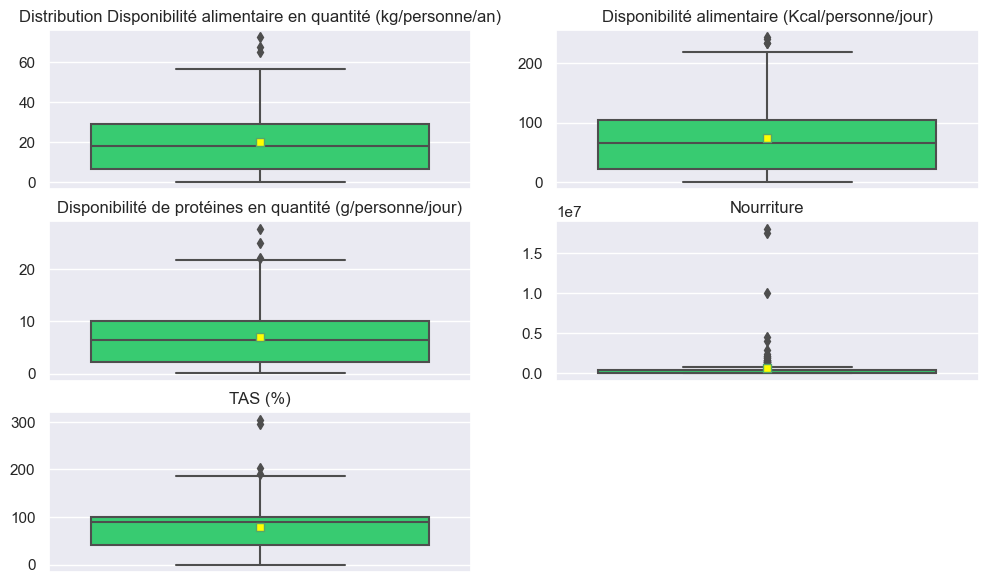

In [102]:
# Afficher des boxplot des 5 premières variables

plt.figure(figsize=(12, 12))
sns.set(style="darkgrid")

plt.subplot(521)
sns.boxplot(data=df,y='Disponibilité alimentaire en quantité (kg/personne/an)', orient='h',showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Distribution Disponibilité alimentaire en quantité (kg/personne/an)')

plt.subplot(522)
sns.boxplot(data=df, y='Disponibilité alimentaire (Kcal/personne/jour)', orient='h',showmeans=True,  meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Disponibilité alimentaire (Kcal/personne/jour)')

plt.subplot(523)
sns.boxplot(data=df, y='Disponibilité de protéines en quantité (g/personne/jour)', orient='h',showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Disponibilité de protéines en quantité (g/personne/jour)')

plt.subplot(524)
sns.boxplot(data=df,y='Nourriture', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Nourriture')

plt.subplot(525)
sns.boxplot(data=df,y='TAS (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('TAS (%)')

In [103]:
# Exemple Disponibilité alimentaire en quantité (kg/personne/an) --> 3 zones au la Disponibilité alimentaire en quantité est > 60kg/pers/an.
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='Disponibilité alimentaire en quantité (kg/personne/an)', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
127,Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8000.0,0.00,112.50,109827.0,1.11,8031.0,0.89
70,Israël,67.39,234.0,27.87,556000.0,98.90,0.00,8243848.0,6.58,42757.0,-0.89
129,Samoa,64.77,217.0,21.88,13000.0,0.00,113.33,195352.0,2.43,4246.0,1.18
128,Sainte-Lucie,56.69,241.0,19.00,10000.0,9.09,90.91,180954.0,1.94,11271.0,0.99
126,Saint-Kitts-et-Nevis,55.77,190.0,19.22,3000.0,0.00,100.00,52045.0,3.41,22161.0,0.65


In [104]:
# Exemple Disponibilité alimentaire (Kcal/personne/jour) --> 6 zones au la Disponibilité alimentaire est > 210Kcal/pers/jr.
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False).head(10)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
127,Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8000.0,0.00,112.50,109827.0,1.11,8031.0,0.89
128,Sainte-Lucie,56.69,241.0,19.00,10000.0,9.09,90.91,180954.0,1.94,11271.0,0.99
70,Israël,67.39,234.0,27.87,556000.0,98.90,0.00,8243848.0,6.58,42757.0,-0.89
6,Antigua-et-Barbuda,54.10,233.0,17.77,5000.0,0.00,100.00,95426.0,4.27,16111.0,0.75
162,États-Unis d'Amérique,55.68,219.0,19.93,18100000.0,119.97,0.67,325084756.0,2.74,59060.0,0.34
129,Samoa,64.77,217.0,21.88,13000.0,0.00,113.33,195352.0,2.43,4246.0,1.18
31,Chine - RAS de Hong-Kong,53.51,210.0,22.26,391000.0,8.57,323.93,7306322.0,3.07,45737.0,0.83
21,Brésil,48.03,204.0,15.68,9982000.0,142.27,0.03,207833823.0,3.38,9897.0,-0.42
15,Barbade,46.78,199.0,15.33,13000.0,88.24,11.76,286232.0,0.68,17843.0,0.97
54,Grenade,45.70,192.0,15.50,5000.0,12.50,87.50,110874.0,2.50,9309.0,1.01


In [105]:
# Exemple Disponibilité de protéines en quantité (g/personne/jour) --> 4 zones au la Disponibilité de protéines en quantité est > 20g/pers/jr.
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='Disponibilité de protéines en quantité (g/personne/jour)', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
70,Israël,67.39,234.0,27.87,556000.0,98.90,0.00,8243848.0,6.58,42757.0,-0.89
127,Saint-Vincent-et-les Grenadines,72.31,243.0,25.10,8000.0,0.00,112.50,109827.0,1.11,8031.0,0.89
31,Chine - RAS de Hong-Kong,53.51,210.0,22.26,391000.0,8.57,323.93,7306322.0,3.07,45737.0,0.83
129,Samoa,64.77,217.0,21.88,13000.0,0.00,113.33,195352.0,2.43,4246.0,1.18
162,États-Unis d'Amérique,55.68,219.0,19.93,18100000.0,119.97,0.67,325084756.0,2.74,59060.0,0.34


In [106]:
# Exemple Nourriture --> 2 zones : chine et etats unis ou la nourriture est > 10 000 000 tonnes
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='Nourriture', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
162,États-Unis d'Amérique,55.68,219.0,19.93,18100000.0,119.97,0.67,3.250848e+08,2.74,59060.0,0.34
33,"Chine, continentale",12.33,59.0,3.96,17518000.0,100.41,2.49,1.421022e+09,2.09,8729.0,-0.23
21,Brésil,48.03,204.0,15.68,9982000.0,142.27,0.03,2.078338e+08,3.38,9897.0,-0.42
50,Fédération de Russie,30.98,104.0,10.44,4509000.0,97.54,4.96,1.455301e+08,0.83,10823.0,-0.64
95,Mexique,32.52,123.0,9.26,4058000.0,77.01,23.04,1.247773e+08,5.01,9434.0,-0.72


In [107]:
# Exemple TAS --> 2 zones (Belgique / pays bas) ou le TAS est > 210% 
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='TAS (%)', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
16,Belgique,12.65,44.0,4.57,144000.0,304.61,222.37,11419748.0,2.38,44162.0,0.43
112,Pays-Bas,20.33,70.0,8.48,346000.0,295.70,163.44,17021347.0,1.06,48461.0,0.92
114,Pologne,30.30,107.0,12.14,1150000.0,203.37,4.76,37953180.0,-0.54,13615.0,0.52
144,Thaïlande,12.95,47.0,4.35,896000.0,190.24,0.23,69209810.0,1.56,6437.0,-0.75
63,Hongrie,25.27,104.0,9.80,246000.0,185.34,21.80,9729823.0,-1.06,14620.0,0.81


Text(0.5, 1.0, 'Stabilite_Politique')

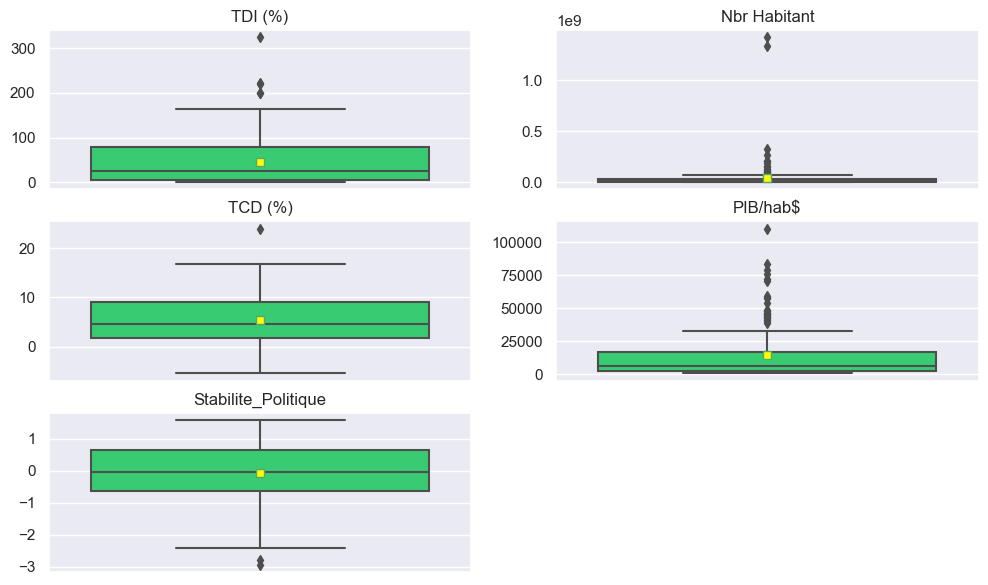

In [108]:
# Afficher des boxplot des 5 autres variables 

plt.figure(figsize=(12, 12))
sns.set(style="darkgrid")

plt.subplot(521)
sns.boxplot(data=df,y='TDI (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('TDI (%)')

plt.subplot(522)
sns.boxplot(data=df,y='Nbr Habitant', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Nbr Habitant')

plt.subplot(523)
sns.boxplot(data=df,y='TCD (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('TCD (%)')

plt.subplot(524)
sns.boxplot(data=df,y='PIB/hab$', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('PIB/hab$')

plt.subplot(525)
sns.boxplot(data=df,y='Stabilite_Politique', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
plt.title('Stabilite_Politique')

In [109]:
# Exemple TDI --> 1 zone (Chine - RAS de Hong-Kong) ou le TDI est > 230% 
# On décide de ne pas l'enlever de nos analyses

df.sort_values(by='TDI (%)', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
31,Chine - RAS de Hong-Kong,53.51,210.0,22.26,391000.0,8.57,323.93,7306322.0,3.07,45737.0,0.83
16,Belgique,12.65,44.0,4.57,144000.0,304.61,222.37,11419748.0,2.38,44162.0,0.43
145,Timor-Leste,4.24,14.0,1.46,5000.0,20.00,220.00,1243258.0,7.80,1300.0,0.07
164,Îles Salomon,4.45,18.0,1.51,3000.0,0.00,200.00,636039.0,11.32,2284.0,0.20
52,Gambie,3.53,12.0,1.24,8000.0,25.00,200.00,2213889.0,12.74,632.0,-0.08


In [110]:
# Exemple Nbr habitant --> 2 zones (chine et inde) ou le Nbr d'habitant est > 500 000 000
# On décide de ne pas les enlever de nos analyses

df.sort_values(by='Nbr Habitant', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
33,"Chine, continentale",12.33,59.0,3.96,17518000.0,100.41,2.49,1.421022e+09,2.09,8729.0,-0.23
64,Inde,2.22,7.0,0.75,2965000.0,96.83,0.00,1.338677e+09,4.52,1938.0,-0.76
162,États-Unis d'Amérique,55.68,219.0,19.93,18100000.0,119.97,0.67,3.250848e+08,2.74,59060.0,0.34
65,Indonésie,7.19,25.0,2.42,1904000.0,99.05,0.04,2.646510e+08,5.10,3840.0,-0.50
109,Pakistan,5.86,20.0,1.97,1218000.0,99.92,0.16,2.079062e+08,8.70,1558.0,-2.41


In [111]:
# Exemple Taux_Croissance_Demographique --> 1 zone (OMAN) a un taux de croissance demographique >18
# On décide de ne pas l'enlever de nos analyses

df.sort_values(by='TCD (%)', ascending=False).head(5)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
107,Oman,21.63,73.0,7.38,101000.0,6.14,110.53,4665928.0,23.94,17803.0,0.75
102,Niger,0.94,3.0,0.32,20000.0,90.48,14.29,21602382.0,16.74,515.0,-1.27
82,Liban,10.74,38.0,3.90,73000.0,87.67,17.81,6819373.0,15.33,8680.0,-1.63
108,Ouganda,1.52,5.0,0.51,62000.0,98.48,0.00,41166588.0,15.33,787.0,-0.57
79,Koweït,46.25,156.0,15.87,188000.0,29.63,72.49,4056099.0,15.02,29258.0,-0.05


In [112]:
# Exemple PIB/hab$ --> 1 zone (Luxembourg) ou le PIB/hab$ est > 90000$/an
# On décide de ne pas l'enlever de nos analyses

df.sort_values(by='PIB/hab$', ascending=False).head(10)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
85,Luxembourg,18.33,69.0,7.19,11000.0,0.00,100.00,591910.0,9.10,110203.0,1.33
137,Suisse,15.72,55.0,6.49,133000.0,68.42,38.35,8455804.0,4.28,83354.0,1.26
32,Chine - RAS de Macao,34.47,142.0,11.90,21000.0,15.79,121.05,622585.0,7.83,78986.0,1.43
104,Norvège,19.05,66.0,7.81,101000.0,99.02,1.96,5296326.0,4.27,75491.0,1.17
69,Islande,29.95,104.0,12.33,10000.0,100.00,20.00,334393.0,2.20,71962.0,1.35
68,Irlande,25.82,100.0,11.60,123000.0,85.94,77.34,4753279.0,2.99,70492.0,1.00
162,États-Unis d'Amérique,55.68,219.0,19.93,18100000.0,119.97,0.67,325084756.0,2.74,59060.0,0.34
41,Danemark,28.98,112.0,12.97,166000.0,103.59,79.64,5732274.0,1.67,57888.0,0.87
10,Australie,47.65,192.0,16.60,1171000.0,108.37,1.37,24584620.0,5.72,57431.0,0.89
139,Suède,16.60,61.0,7.09,164000.0,83.96,44.92,9904896.0,2.98,53789.0,0.98


In [113]:
#Exemple Stabilite_Politique--> 4 zones ont entre - 2 et -3 sur l'échelle de stabilité politique en dehors de l'ecart IQ.
# On décide de ne pas l'enlever de nos analyses

df.sort_values(by='Stabilite_Politique', ascending=True).head(4)

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
156,Yémen,8.53,30.0,3.04,237000.0,68.29,31.71,27834819.0,10.69,612.0,-2.94
0,Afghanistan,1.53,5.0,0.54,55000.0,49.12,50.88,36296113.0,12.48,530.0,-2.80
109,Pakistan,5.86,20.0,1.97,1218000.0,99.92,0.16,207906209.0,8.70,1558.0,-2.41
67,Iraq,14.95,52.0,5.37,561000.0,16.96,83.04,37552781.0,13.26,4725.0,-2.31


 > *Nous avons plusieurs outliers. Nous n’allons pas les enlever de notre analyse mais nous gardons ces pays dans un coin de la tête pour voir comment les modèles de clustering les traiteront.*

<h2 align="center"> <font color='#6F16B0'> B) Analyse des relations entre nos variables </font>  <h2>     

 > *Nous observation les corrélations entre les différentes variables pour comprendre leurs liens. Ici je propose une représentation graphique: une matrice des corrélation permettant d’analyser visuellement ces liens:*

Text(0.5, 1.0, 'Corrélation entre les différentes variables')

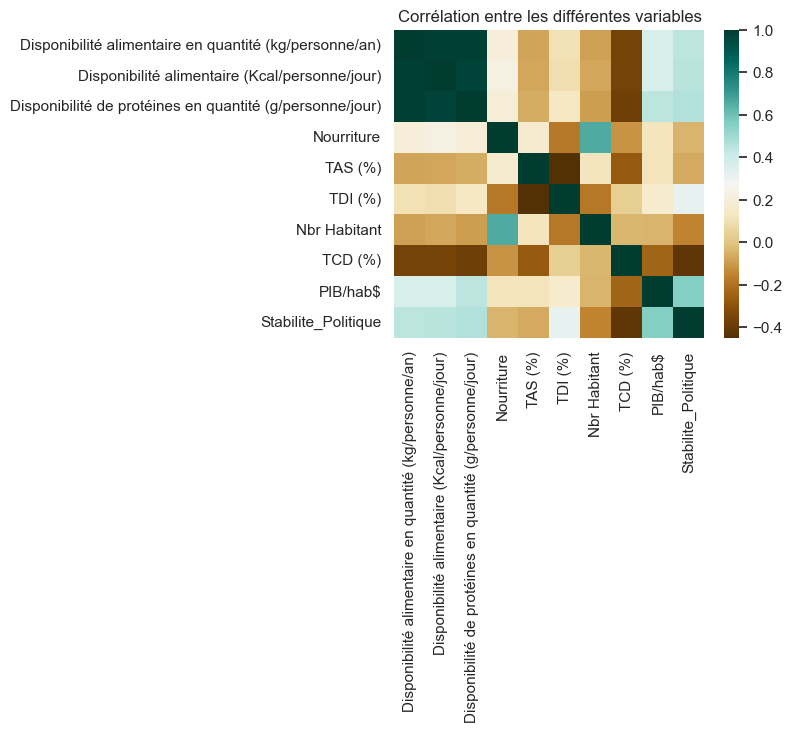

In [114]:
# heatmap de corrélations entre les différentes variables
plt.figure(figsize=(5, 4))
sns.heatmap(df.corr(),cmap='BrBG')
plt.title('Corrélation entre les différentes variables')

In [115]:
# Afficher la matrice de corrélation
#corr_df = df.corr()
pd.DataFrame(df.corr())

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
Disponibilité alimentaire en quantité (kg/personne/an),1.000000,0.987894,0.985531,0.192897,-0.080633,0.102114,-0.090052,-0.364223,0.368244,0.442593
Disponibilité alimentaire (Kcal/personne/jour),0.987894,1.000000,0.971596,0.219755,-0.072000,0.090763,-0.071148,-0.364113,0.370261,0.449717
Disponibilité de protéines en quantité (g/personne/jour),0.985531,0.971596,1.000000,0.185932,-0.062465,0.128465,-0.094897,-0.380243,0.443629,0.466809
Nourriture,0.192897,0.219755,0.185932,1.000000,0.164992,-0.188598,0.656199,-0.117573,0.118195,-0.045691
TAS (%),-0.080633,-0.072000,-0.062465,0.164992,1.000000,-0.449666,0.117430,-0.278842,0.116369,-0.069798
TDI (%),0.102114,0.090763,0.128465,-0.188598,-0.449666,1.000000,-0.187507,0.032329,0.156488,0.319670
Nbr Habitant,-0.090052,-0.071148,-0.094897,0.656199,0.117430,-0.187507,1.000000,-0.040133,-0.046378,-0.149636
TCD (%),-0.364223,-0.364113,-0.380243,-0.117573,-0.278842,0.032329,-0.040133,1.000000,-0.245707,-0.417156
PIB/hab$,0.368244,0.370261,0.443629,0.118195,0.116369,0.156488,-0.046378,-0.245707,1.000000,0.554730
Stabilite_Politique,0.442593,0.449717,0.466809,-0.045691,-0.069798,0.319670,-0.149636,-0.417156,0.554730,1.000000


> *Observations: Les disponibilités alimentaire sont correlées positivement entre elles. On peut alors se poser la question d’en garder qu’une ou de toutes les garder. J’ai fait le choix de les garder et d’ajuster en fonction lors de nos analyses futures. Le nombre d’habitant est corrélée positivement à la quantité de nourriture. Le TDI est négativement corrélé au TAS. Le PIB/hab est légèrement corrélé à la stabilité politique.*

<h2 align="center"> <font color='#6F16B0'> C) Normalisation de nos variables </font>  <h2>         

 > *Normalisation : Il est indispensable de normaliser nos variables quantitatives, c’est-à-dire de toutes les mettre sur la même echelle, cela facilite l’apprentissager des modèles qui sont basés sur la descente de gradient les calculs de variances, les calculs de distances.*

 > *La normalisation MinMax : La normalisation min max consiste à transformer chaque variable de tel sorte que les valeurs sont comprises entre 0 et 1. Pour ce faire on soustrait chaque valeurs d’une variable au minimum de cette variable puis on soustrait par l’écart entre le min et max de cette variable.* 

 > *La normalisation standardisé (standardisation) : cette technique consiste a transformer nos données de tel sorte a ce que chaque variable est une moyenne égal à 0 et un ecart type egal à 1. Pour ce faire il faut soustraite chaque valeur à la moyenne initiale de notre variable et diviser le tout par l'écart type initial de notre variable.*

 > *Attention MinMax comme StandardScaler sont sensibles aux valeurs abérrantes (outliers). On pourrait faire appel au RobustScaler qui permettrait une normalisation de nos données originales sans pour autant deformer nos données à causes des outliers qui pourraient y avoir. RobustScaler : Contrairement à la standardisation ici on ne soustrait pas nos données à la moyenne de chaque variable à la place on soustrait nos données à la médiane de chaque variable. Hors la variable est moins sensible qu'une moyenne aux outliers. Ensuite au lieu de diviser par un ecart type on va diviser par l'interquartile de nos données c'est à dire qu'on divise par l'écart qu'il y a dans nos données entre le 3ième quartile et le 1ier quartile.*

<h5 align="center"> <font color='#6F16B0'> MinMaxScaler </font>  <h5>       

In [116]:
# Exemple MinMaxScaler
# Création de la Liste des noms des colonnes que l'on normalise
ListNumbers = ['TAS (%)','TDI (%)','TCD (%)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Nourriture', 'Nbr Habitant', 'PIB/hab$', 'Stabilite_Politique']

# Création de la Liste des noms des colonnes que l'on ne normalise pas
ListQualiAndRatio = ['Zone']

# Dataframe temporaire de la partie non normalisé
dfQUaliAndRatio = pd.DataFrame(df, columns=ListQualiAndRatio)

# Création et normalisation du dataframe de la partie que l'on veut normaliser
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
dfNorm_TMP = scaler.fit_transform(df[ListNumbers])
dfNorm_TMP = pd.DataFrame(dfNorm_TMP, columns=ListNumbers)


# Jointure des deux Dataframe
dfNorm = pd.merge(dfQUaliAndRatio, dfNorm_TMP, left_index=True, right_index=True)

Text(0, 0.5, 'Dispo alimenaire en protéines')

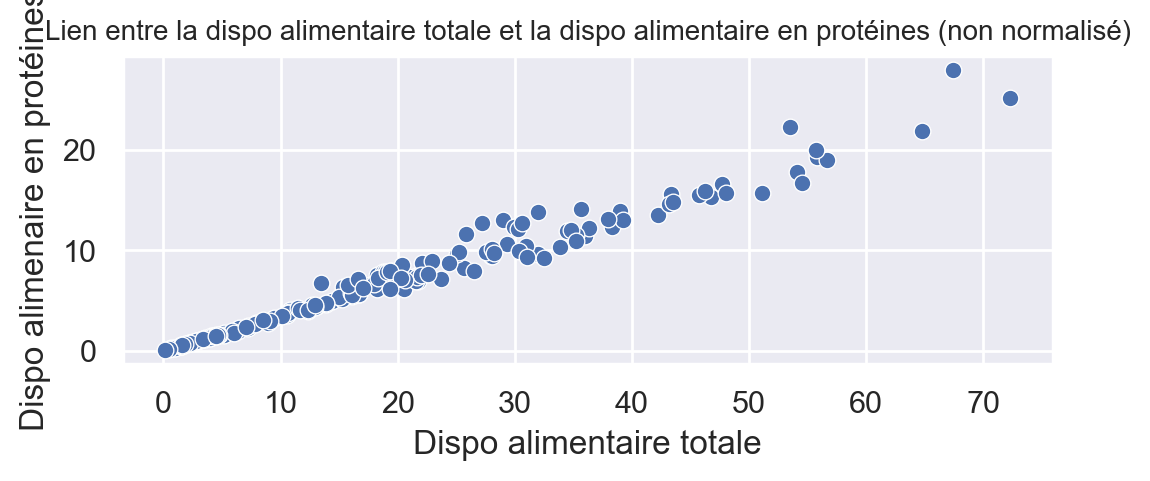

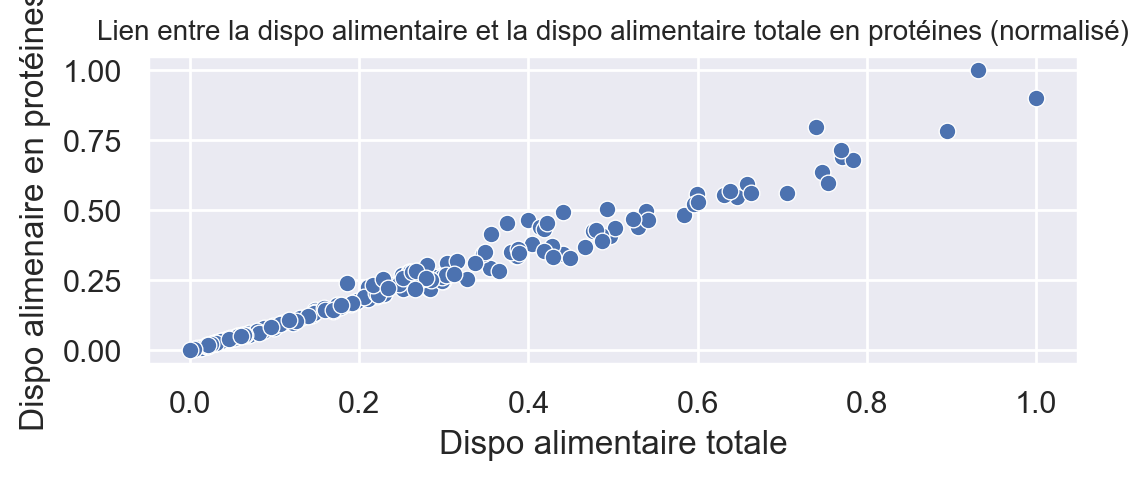

In [117]:
# Exemple de la normalisation de nos données

# Graphique non normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=df, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire totale et la dispo alimentaire en protéines (non normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

# Graphique normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=dfNorm, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire et la dispo alimentaire totale en protéines (normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

 > *Ici on voit que la distribution a la même forme seul l'échelle est est différente en respectant le même rapport, le même écart entre chaquer données de ces variables.* 

<h5 align="center"> <font color='#6F16B0'> RobustScaler </font>  <h5>     

Text(0, 0.5, 'Dispo alimenaire en protéines')

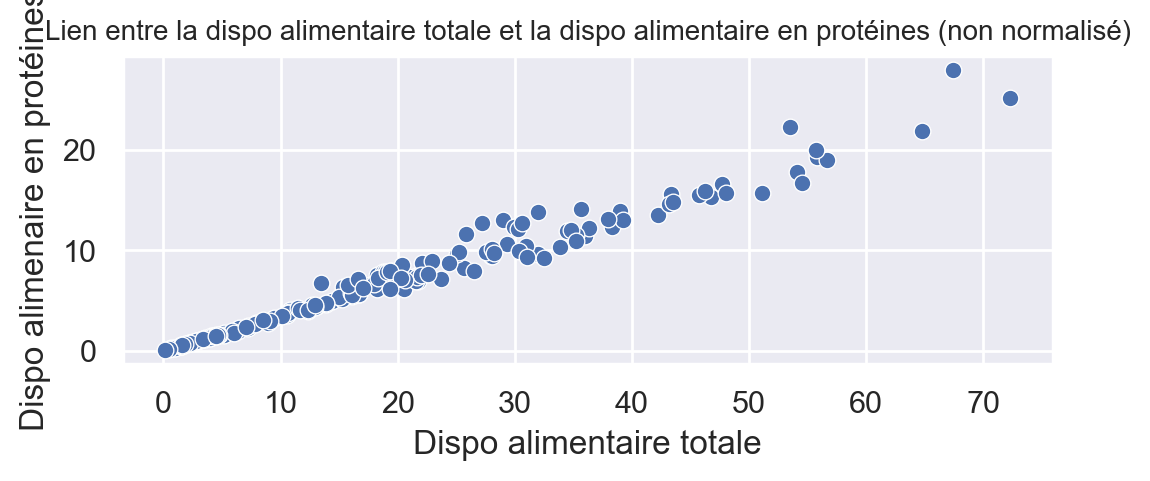

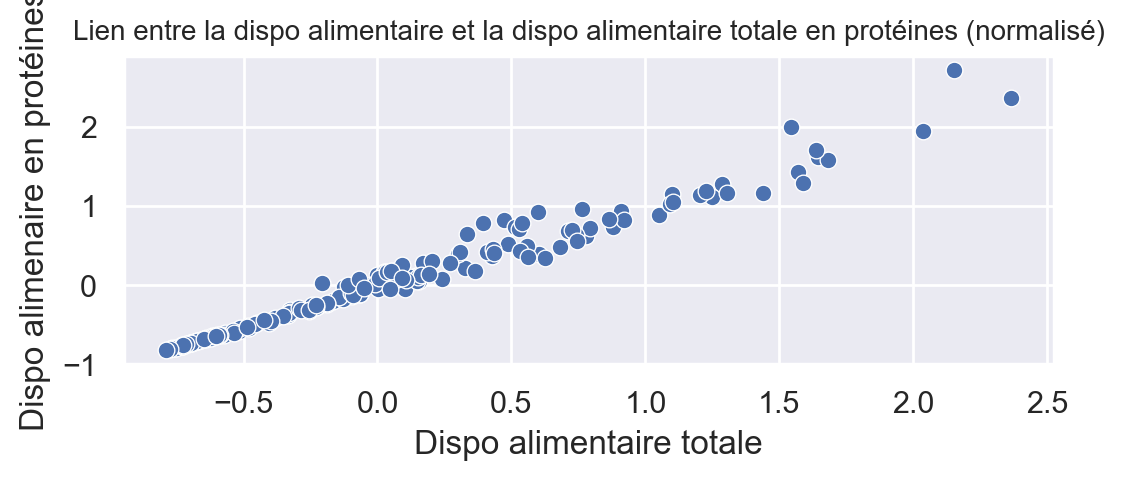

In [118]:
# Création de la Liste des noms des colonnes que l'on normalise
ListNumbers = ['TAS (%)','TDI (%)','TCD (%)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Nourriture', 'Nbr Habitant', 'PIB/hab$', 'Stabilite_Politique']

# Création de la Liste des noms des colonnes que l'on ne normalise pas
ListQualiAndRatio = ['Zone']

# Dataframe temporaire de la partie non normalisé
dfQUaliAndRatio = pd.DataFrame(df, columns=ListQualiAndRatio)


# Création et normalisation du dataframe de la partie que l'on veut normaliser
scaler = preprocessing.RobustScaler()
dfRobS_TMP = scaler.fit_transform(df[ListNumbers])
dfRobS_TMP = pd.DataFrame(dfRobS_TMP, columns=ListNumbers)


# Jointure des deux Dataframe
dfRobS = pd.merge(dfQUaliAndRatio, dfRobS_TMP, left_index=True, right_index=True)


# Exemple de la normalisation de nos données

# Graphique non normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=df, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire totale et la dispo alimentaire en protéines (non normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

# Graphique normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=dfRobS, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire et la dispo alimentaire totale en protéines (normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

<h5 align="center"> <font color='#6F16B0'> StandardScaler </font>  <h5>        

In [119]:
# Création de la Liste des noms des colonnes que l'on normalise
ListNumbers = ['TAS (%)','TDI (%)','TCD (%)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Nourriture', 'Nbr Habitant', 'PIB/hab$', 'Stabilite_Politique']

# Création de la Liste des noms des colonnes que l'on ne normalise pas
ListQualiAndRatio = ['Zone']

# Dataframe temporaire de la partie non normalisé
dfQUaliAndRatio = pd.DataFrame(df, columns=ListQualiAndRatio)

# Création et normalisation du dataframe de la partie que l'on veut normaliser
scaler = preprocessing.StandardScaler()
AStand_TMP = scaler.fit_transform(df[ListNumbers])
dfStand_TMP = pd.DataFrame(AStand_TMP, columns=ListNumbers)

# Vérifie bien que la moyenne est égale à 0 et l'écart type soit de 1 :
idx = ["mean", "std"]
pd.DataFrame(AStand_TMP).describe().round(2).loc[idx, :]

# Jointure des deux Dataframe
dfStand = pd.merge(dfQUaliAndRatio, dfStand_TMP, left_index=True, right_index=True)

Text(0, 0.5, 'Dispo alimenaire en protéines')

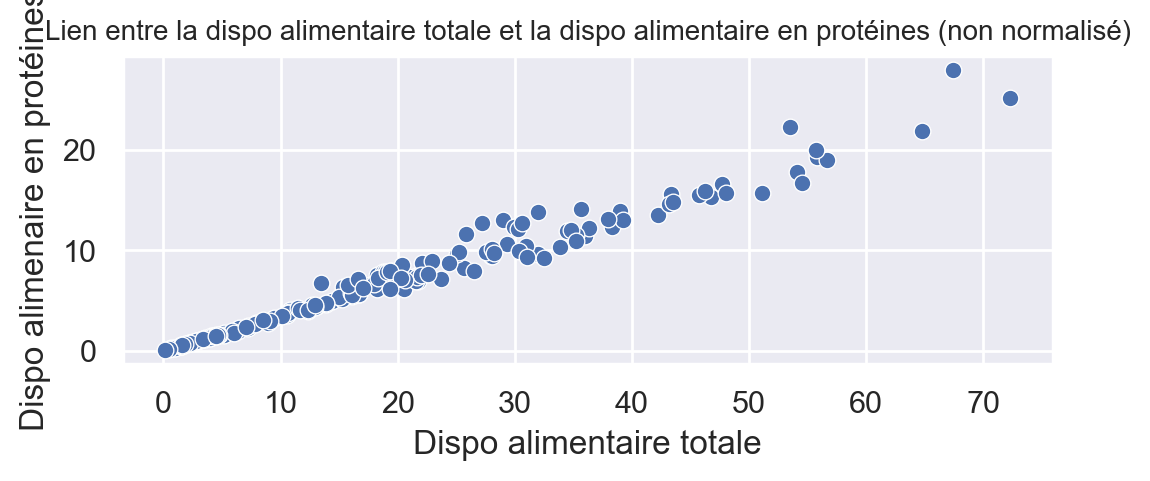

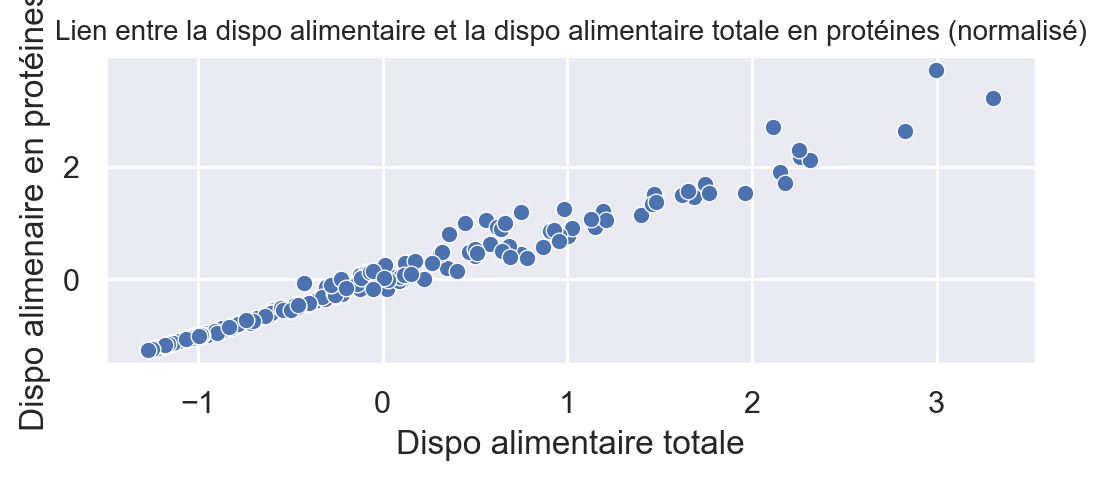

In [120]:
# Exemple de la normalisation de nos données

# Graphique non normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=df, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire totale et la dispo alimentaire en protéines (non normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

# Graphique normalisé
plt.figure(figsize=(6,2), dpi=200)
sns.scatterplot(data=dfStand, x='Disponibilité alimentaire en quantité (kg/personne/an)', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.title("Lien entre la dispo alimentaire et la dispo alimentaire totale en protéines (normalisé)", fontsize=10)
plt.xlabel('Dispo alimentaire totale')
plt.ylabel('Dispo alimenaire en protéines')

<h2 align="center"> <font color='#6F16B0'> D) Sauvegarde de notre table de travail dans un fichier </font>  <h2>         

In [121]:
# Sauvegarde de ces deux tables dans des fichiers csv qu'on utilisera dans un autre notebook d'analyse.

# Sauvegarde du dataframe de travail final
df.to_csv('C:/Users/User/Desktop/Projet_9/Donnees/df.csv',index=None)

# Sauvegarde du dataframe de travail final et normalisé
dfNorm.to_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfNorm.csv',index=None)

# Sauvegarde du dataframe de travail final et normalisé (RobustScaler)
dfRobS.to_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfRobS.csv',index=None)

# Sauvegarde du dataframe de travail final et normalisé (RobustScaler)
dfStand.to_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfStand.csv',index=None)